In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize']=[10,7]

In [12]:
# show same images from the non-notebook example
import pycuda.autoinit
from pycuda import gpuarray
from matching import circle_image
import lagomorph as lm
width = 128
source = gpuarray.to_gpu(circle_image(width, width, width//2, width//2, width//4))
target = gpuarray.to_gpu(circle_image(width, width, width*5//8, width//2, width//4))

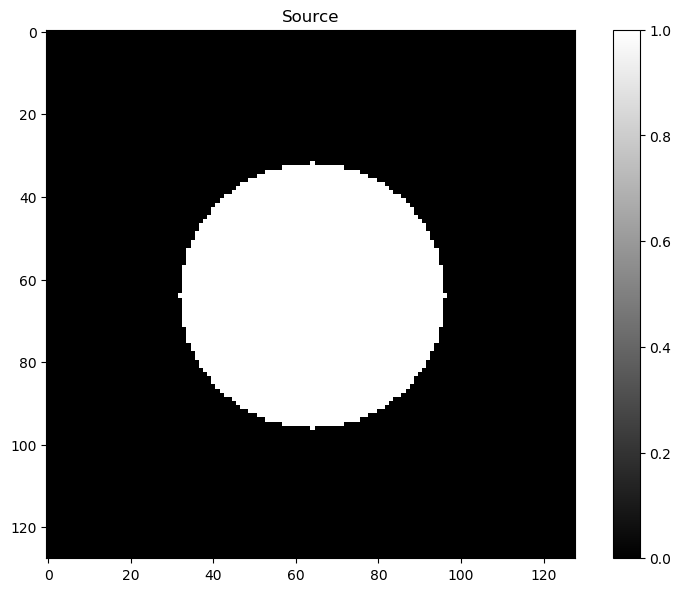

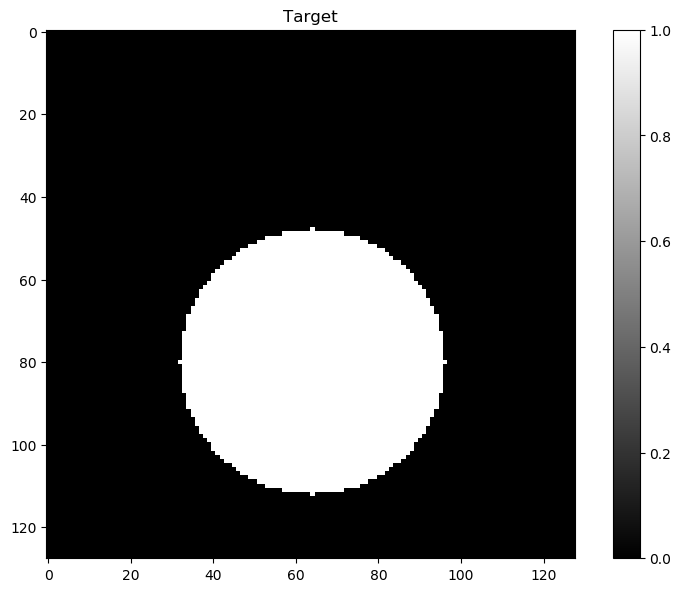

In [10]:
plt.imshow(source.get().squeeze(), cmap='gray')
plt.title('Source')
_=plt.colorbar()
plt.figure()
plt.imshow(target.get().squeeze(), cmap='gray')
plt.title('Target')
_=plt.colorbar()

In [28]:
alpha = 1.0
beta = 0.01
gamma = 0.01
m0 = lm.matching.matching(source, target, alpha, beta, gamma, num_iters=100)

Iteration   1 of 100  SSE=   2016.00 |m0|^2=      0.00 E=   2016.00
Iteration   2 of 100  SSE=   1847.79 |m0|^2=      0.79 E=   1848.58
Iteration   3 of 100  SSE=   1710.58 |m0|^2=      2.91 E=   1713.50
Iteration   4 of 100  SSE=   1584.54 |m0|^2=      6.33 E=   1590.87
Iteration   5 of 100  SSE=   1453.99 |m0|^2=     10.96 E=   1464.94
Iteration   6 of 100  SSE=   1334.21 |m0|^2=     16.76 E=   1350.97
Iteration   7 of 100  SSE=   1220.83 |m0|^2=     23.64 E=   1244.47
Iteration   8 of 100  SSE=   1106.33 |m0|^2=     31.44 E=   1137.77
Iteration   9 of 100  SSE=    995.86 |m0|^2=     40.06 E=   1035.91
Iteration  10 of 100  SSE=    889.64 |m0|^2=     49.30 E=    938.93
Iteration  11 of 100  SSE=    793.23 |m0|^2=     58.76 E=    851.99
Iteration  12 of 100  SSE=    706.90 |m0|^2=     67.76 E=    774.66
Iteration  13 of 100  SSE=    635.54 |m0|^2=     75.83 E=    711.37
Iteration  14 of 100  SSE=    573.92 |m0|^2=     83.03 E=    656.96
Iteration  15 of 100  SSE=    522.27 |m0|^2=    

Text(0.5,1,'m0 (scaled by 3000)')

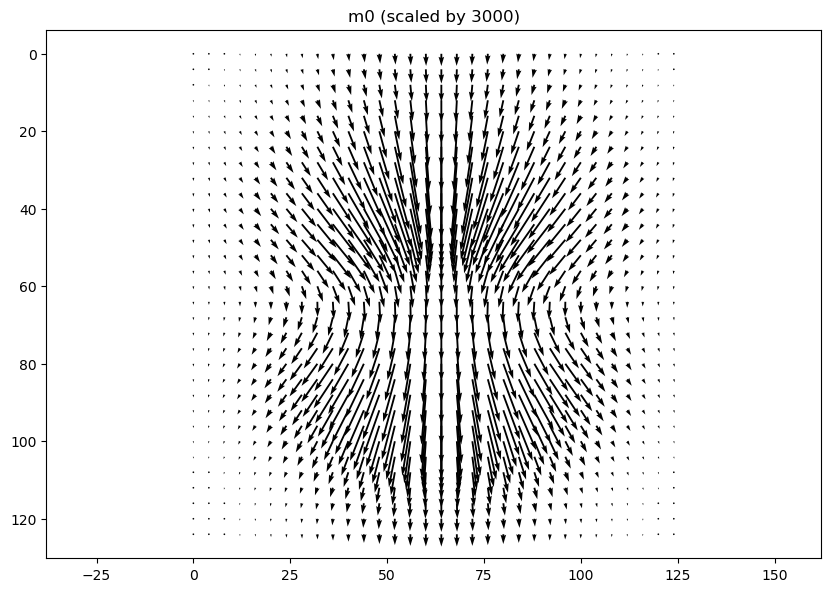

In [29]:
momscale = 3000
lm.quiver(m0*5000)
plt.title(f"m0 (scaled by {momscale})")

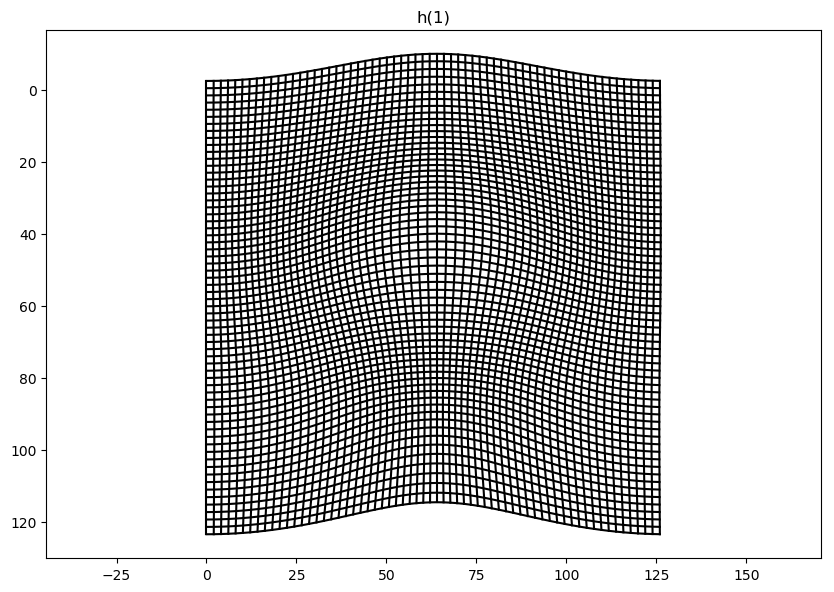

In [33]:
metric = lm.FluidMetric(alpha=alpha, beta=beta, gamma=gamma, shape=m0.shape,    
            allocator=source.allocator)
h = lm.expmap(m0, metric)
lm.gridplot(h) #, 16, 16)
_=plt.title('h(1)')